In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("netflix_titles.csv")

# Preview data
df.head()

import warnings
warnings.filterwarnings('ignore')




In [13]:
#Step 2: Cleaning & Feaature Engineering

In [15]:
# Copy the original DataFrame
df_clean = df.copy()

# Strip whitespaces and convert to datetime safely
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'].str.strip(), errors='coerce', infer_datetime_format=True)

# Extract year and month
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month_name()

# Fill missing values
df_clean['country'] = df_clean['country'].fillna('Unknown')
df_clean['rating'] = df_clean['rating'].fillna('Not Rated')
df_clean['duration'] = df_clean['duration'].fillna('Unknown')

# Clean duration fields
df_clean['duration_int'] = df_clean['duration'].str.extract(r'(\d+)').astype(float)
df_clean['duration_type'] = df_clean['duration'].str.extract(r'([a-zA-Z]+)')

# First genre extraction
df_clean['main_genre'] = df_clean['listed_in'].str.split(',').str[0]

# Preview
df_clean[['title', 'type', 'country', 'release_year', 'year_added', 'duration', 'duration_int', 'duration_type', 'main_genre']].head()



,title,type,country,release_year,year_added,duration,duration_int,duration_type,main_genre
0,Dick Johnson Is Dead,Movie,United States,2020,2021.0,90 min,90.0,min,Documentaries
1,Blood & Water,TV Show,South Africa,2021,2021.0,2 Seasons,2.0,Seasons,International TV Shows
2,Ganglands,TV Show,Unknown,2021,2021.0,1 Season,1.0,Season,Crime TV Shows
3,Jailbirds New Orleans,TV Show,Unknown,2021,2021.0,1 Season,1.0,Season,Docuseries
4,Kota Factory,TV Show,India,2021,2021.0,2 Seasons,2.0,Seasons,International TV Shows


In [18]:
#Step 3: Visaulization in python

In [20]:
sns.set(style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = (10, 6)


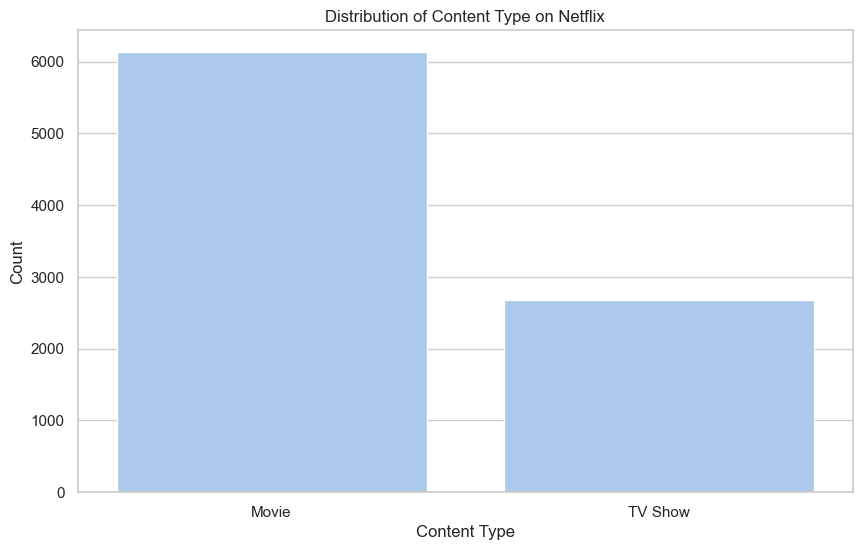

In [22]:
sns.countplot(data=df_clean, x='type')
plt.title('Distribution of Content Type on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

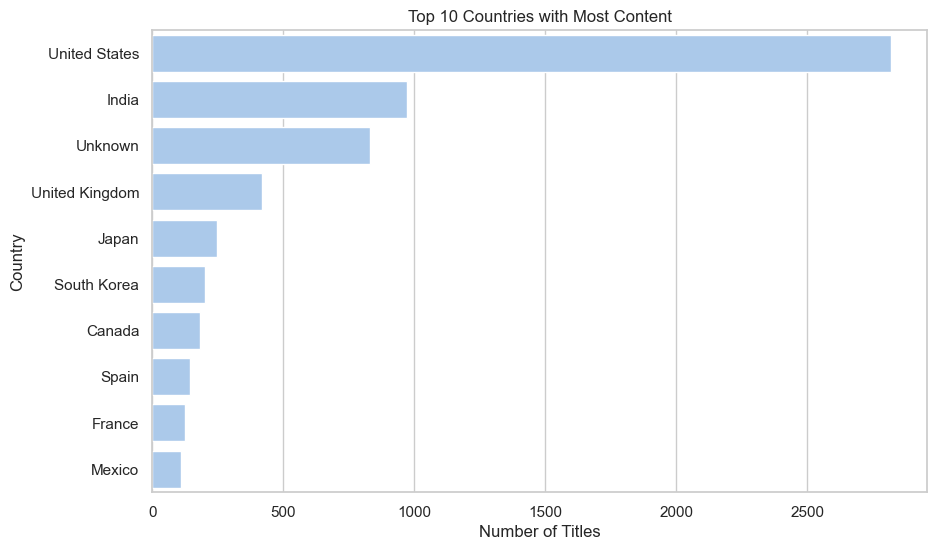

In [24]:
top_countries = df_clean['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries with Most Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()


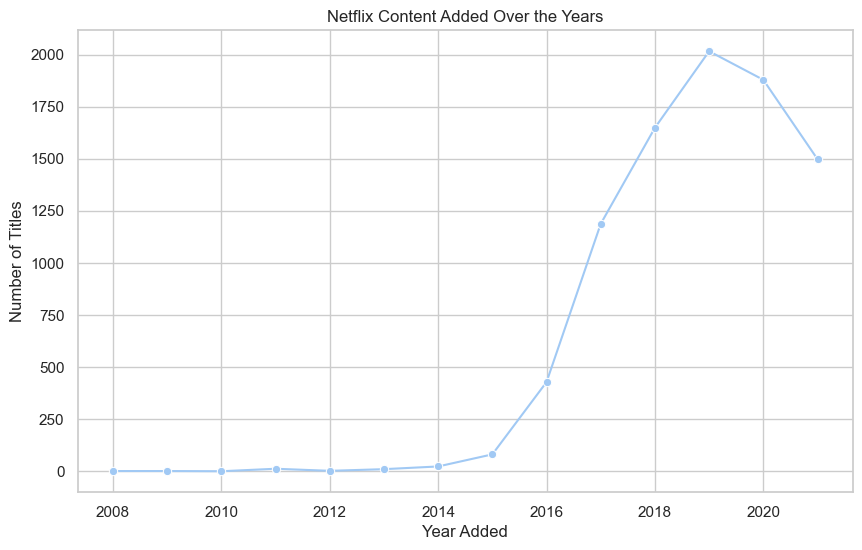

In [26]:
content_by_year = df_clean['year_added'].value_counts().sort_index()
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.show()


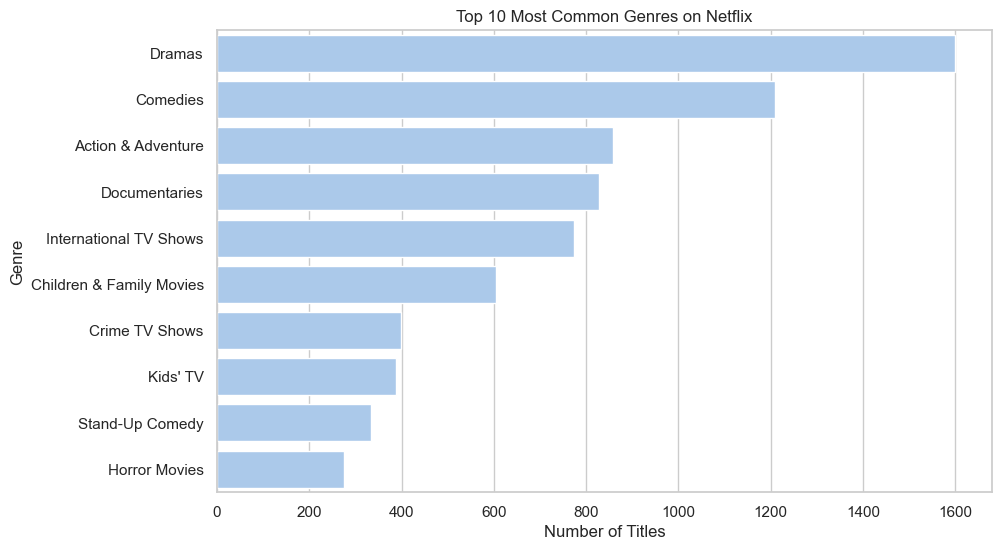

In [28]:
top_genres = df_clean['main_genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


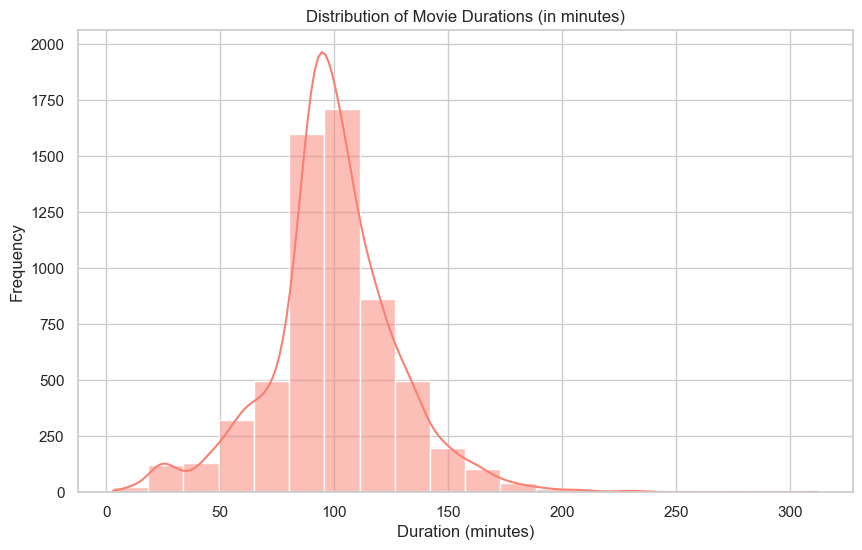

In [30]:
movie_durations = df_clean[(df_clean['type'] == 'Movie') & (df_clean['duration_type'] == 'min')]
sns.histplot(movie_durations['duration_int'].dropna(), bins=20, kde=True, color='salmon')
plt.title('Distribution of Movie Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


In [32]:
# Save the cleaned dataset to CSV
df_clean.to_csv("cleaned_netflix_data.csv", index=False)
print("✅ File 'cleaned_netflix_data.csv' saved for Tableau use.")

✅ File 'cleaned_netflix_data.csv' saved for Tableau use.
